<a href="https://colab.research.google.com/github/jothikak780/Muniyammal/blob/main/OSF_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
df=pd.read_csv("/content/spam.csv",encoding="latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.rename({"v1":"SPAM_label1","v2":"SPAM_text"},inplace=True,axis=1)

In [ ]:
df.tail()

,SPAM_label1,SPAM_text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['SPAM_label1']=le.fit_transform(df['SPAM_label1'])

In [ ]:

x = df.iloc[:,1:3001]
x

,SPAM_text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
y = df.iloc[:,-1].values
y

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [ ]:
print("before oversampling,counts of SPAM_label1 '1':{}".format (sum(y_train==1)))
print("before oversampling,counts of SPAM_label1 '0': {} \n".format(sum(y_train==0)))
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)



before oversampling,counts of SPAM_label1 '1':0
before oversampling,counts of SPAM_label1 '0': 0 



In [ ]:
print("after oversampling, the shape of x_train:{}".format( x_train.shape))
print("after oversampling,the shape of y_train:{} \n".format( y_train.shape))

after oversampling, the shape of x_train:(4179, 4)
after oversampling,the shape of y_train:(4179,) 



In [ ]:
print("after oversampling, the shape of X_train:{}".format( X_train.shape))
print("after oversampling,the shape of Y_train:{} \n".format( Y_train.shape))

after oversampling, the shape of X_train:(4179, 4)
after oversampling,the shape of Y_train:(4179,) 



In [ ]:
print("after oversampling, the shape of x_train:{}".format( x_train.shape))
print("after oversampling,the shape of y_train:{} \n".format( y_train.shape))

after oversampling, the shape of x_train:(4179, 4)
after oversampling,the shape of y_train:(4179,) 



In [ ]:
print("after oversampling,counts of SPAM_label1 '1': {}".format (sum(y_train==1)))
print("after oversampling,counts of SPAM_label1 '0': {} \n".format(sum(y_train==0)))

after oversampling,counts of SPAM_label1 '1': 0
after oversampling,counts of SPAM_label1 '0': 0 



In [ ]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import re
corpus=[]
length=len(df)

In [ ]:
for i in range(0,length):
  SPAM_text =re.sub("[^a-zA-Z0-9]"," ",df["SPAM_text"][i])
  SPAM_text=SPAM_text.lower()
  SPAM_text=SPAM_text.split()
  pe=PorterStemmer()
  stopword=stopwords.words("english")
  SPAM_text=[pe.stem(word)for word in SPAM_text if not word in set (stopword)]
  SPAM_text=" ".join (SPAM_text)
  corpus.append(SPAM_text)


In [ ]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free mem

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
x = cv.fit_transform(corpus).toarray() 

In [ ]:
import pickle 
pickle.dump(cv, open('cv1.pkl', 'wb'))

In [ ]:
df['length'] = df['SPAM_text'].apply(len)
df.head()

,SPAM_label1,SPAM_text,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [ ]:
df['length'] = df['SPAM_text'].apply(len)
df.tail()

,SPAM_label1,SPAM_text,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,161
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,37
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,57
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,125
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN,26


In [51]:
df.describe()

,SPAM_label1,length
count,5572.000000,5572.000000
mean,0.134063,80.118808
std,0.340751,59.690841
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,121.000000
max,1.000000,910.000000


In [ ]:
df.shape

(5572, 6)

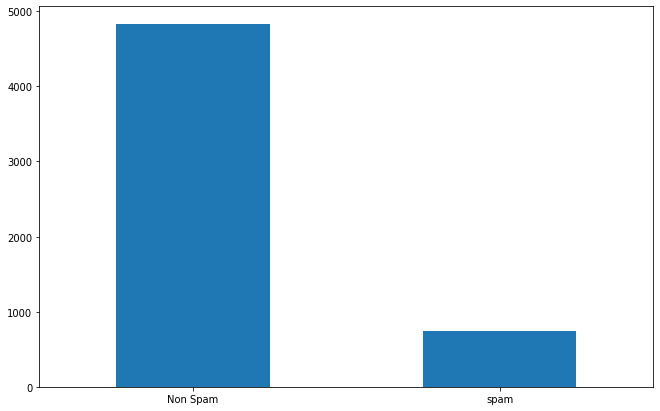

In [49]:
df["SPAM_label1"].value_counts().plot(kind= "bar",figsize=(11,7))
plt.xticks(np.arange(2), ('Non Spam', 'spam'),rotation=0);

In [54]:
display(df.head(n = 10))

,SPAM_label1,SPAM_text,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,148
6,0,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,160
8,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,158
9,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,154


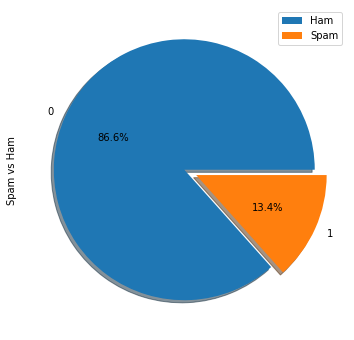

In [55]:
df["SPAM_label1"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)